In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

2024-06-04 21:56:44.963914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 21:56:45.006511: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-04 21:56:45.007252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 21:56:45.736410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# load dataset
dataset = np.loadtxt('Project_2/MNIST_Clusterin_Classification_Comparison/A_Z Handwritten Data.csv', delimiter=',')
seed = 785


# split into input and output variables
X = dataset[:,0:784]
Y = dataset[:,0]

# split the data into training (50%) and testing (50%)
(XTrain, XTest, YTrain, YTest) = train_test_split(X, Y, test_size=0.150, random_state=seed)

In [3]:

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))

XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (316583, 784)
XTest shape =  (55868, 784)
YTrain shape =  (316583,)
YTest shape =  (55868,)
YTrain values =  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
YTest values =  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
YTrain distribution =  {0.0: 11786, 1.0: 7342, 2.0: 19902, 3.0: 8583, 4.0: 9803, 5.0: 969, 6.0: 4908, 7.0: 6091, 8.0: 950, 9.0: 7176, 10.0: 4756, 11.0: 9918, 12.0: 10483, 13.0: 16089, 14.0: 49086, 15.0: 16462, 16.0: 4962, 17.0: 9812, 18.0: 41109, 19.0: 19087, 20.0: 24719, 21.0: 3564, 22.0: 9189, 23.0: 5388, 24.0: 9241, 25.0: 5208}
YTest distribution =  {0.0: 2084, 1.0: 1326, 2.0: 3507, 3.0: 1551, 4.0: 1637, 5.0: 194, 6.0: 854, 7.0: 1127, 8.0: 170, 9.0: 1317, 10.0: 847, 11.0: 1668, 12.0: 1853, 13.0: 2921, 14.0: 8739, 15.0: 2879, 16.0: 850, 17.0: 1754, 18.0: 73

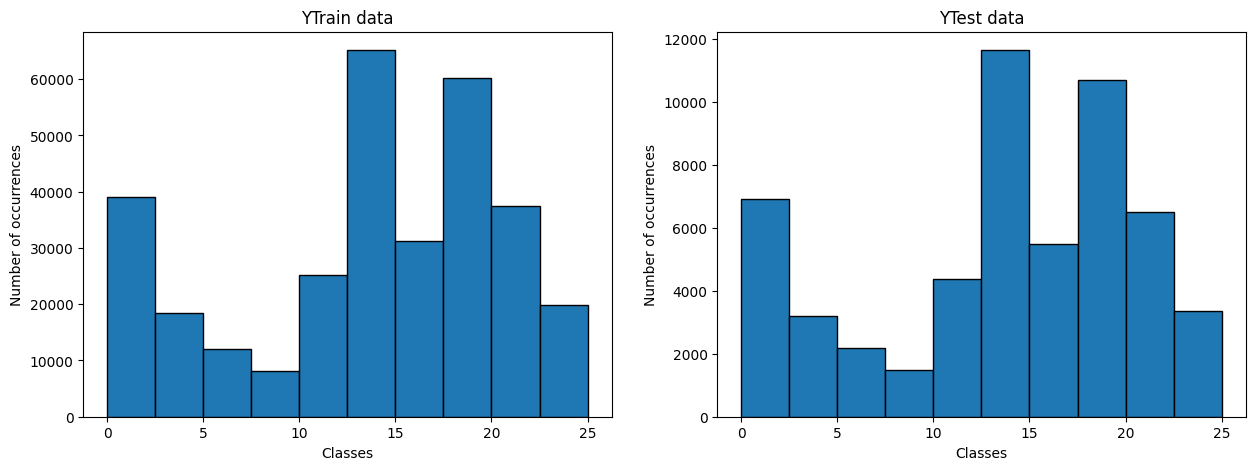

In [4]:
#we plot an histogram distribution of our test and train data.
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].hist(YTrain, ec='black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes') 
axs[0].set_ylabel('Number of occurrences')
axs[1].hist(YTest, ec='black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes') 
axs[1].set_ylabel('Number of occurrences')
# We want to show all ticks...
#axs[0].set_xticks(np.arange(25))
#axs[1].set_xticks(np.arange(25))

plt.show()

In [5]:
# Data normalization.
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)

(316583, 784)
(55868, 784)


In [6]:
InputModel = Input(shape=(784,))

In [7]:
# Encoder
EncodedLayer = Dense(128, activation='relu')(InputModel)

2024-06-04 21:57:01.255565: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-04 21:57:01.256097: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
# Decoder
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

In [9]:
AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
Total params: 201616 (787.56 KB)
Trainable params: 201616 (787.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Let's train the model using adadelta optimizer
AutoencoderModel.compile(optimizer='rmsprop', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))
# Make prediction to decode the digits


2024-06-04 21:57:01.566682: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 992804288 exceeds 10% of free system memory.


Epoch 1/100


2024-06-04 21:57:02.292947: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 992804288 exceeds 10% of free system memory.


1237/1237 [==============================] - 8s 6ms/step - loss: 0.1891 - val_loss: 0.1303
Epoch 2/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.1145 - val_loss: 0.1051
Epoch 3/100
1237/1237 [==============================] - 8s 6ms/step - loss: 0.1007 - val_loss: 0.0976
Epoch 4/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0954 - val_loss: 0.0938
Epoch 5/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 6/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0905 - val_loss: 0.0900
Epoch 7/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0891 - val_loss: 0.0887
Epoch 8/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0880 - val_loss: 0.0877
Epoch 9/100
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0872 - val_loss: 0.0871
Epoch 10/100
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0866 

In [11]:
DecodedDigits_XTrain = AutoencoderModel.predict(XTrain)
DecodedDigits_XTest = AutoencoderModel.predict(XTest)

  93/9894 [..............................] - ETA: 10s 

2024-06-04 22:09:28.995135: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 992804288 exceeds 10% of free system memory.


9894/9894 [==============================] - 11s 1ms/step


2024-06-04 22:09:44.125126: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 992804288 exceeds 10% of free system memory.


1746/1746 [==============================] - 2s 1ms/step


dict_keys(['loss', 'val_loss'])


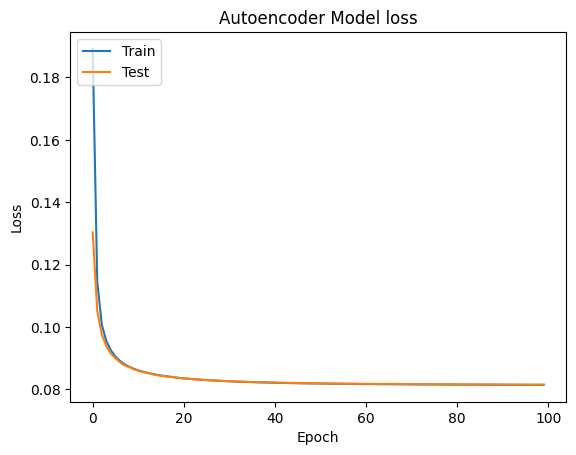

In [12]:
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

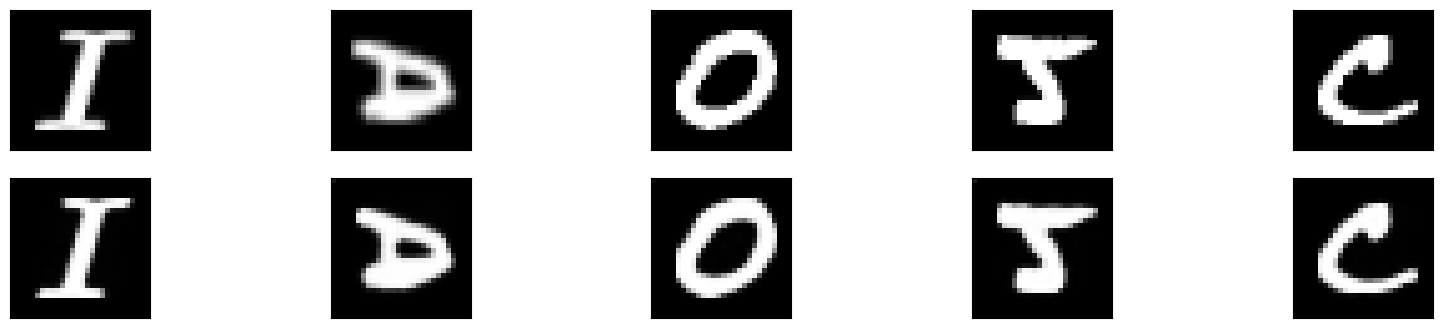

In [13]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(DecodedDigits_XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from sklearn.cluster import KMeans
import random


In [15]:
kmeans = KMeans(n_clusters=25, random_state=2)
clusters = kmeans.fit_predict(DecodedDigits_XTest)


/home/clan-nur/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


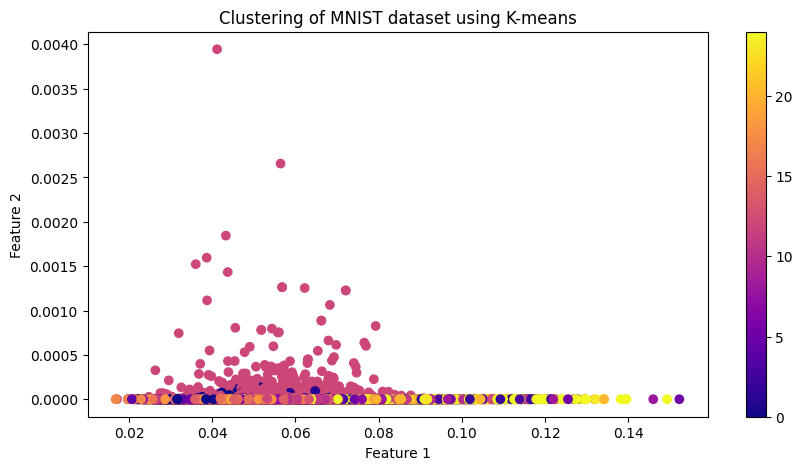

In [16]:
# Plot clusters
plt.figure(figsize=(10, 5))
plt.scatter(DecodedDigits_XTest[:, 0], DecodedDigits_XTest[:, 1], c=clusters, cmap='plasma')
plt.colorbar()
plt.title('Clustering of MNIST dataset using K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

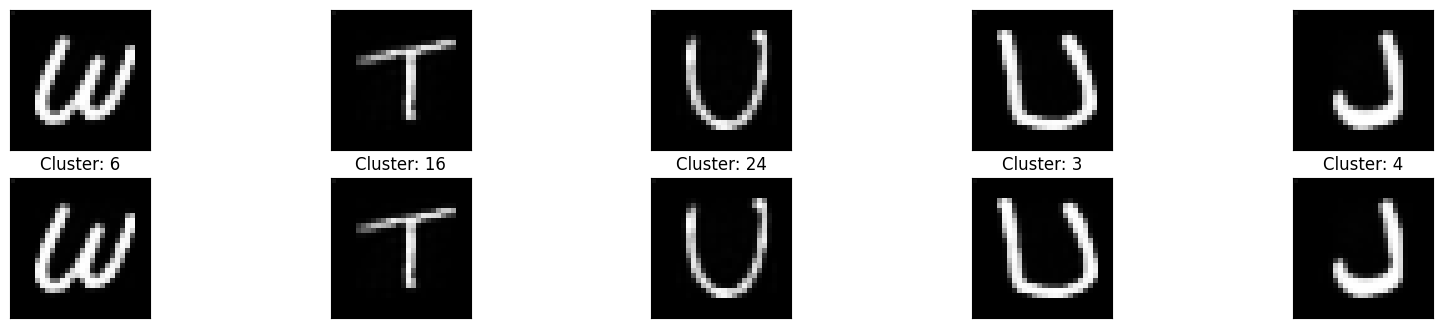

In [17]:
# Plot original images with cluster labels
n = 5  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    k=random.randint(0, DecodedDigits_XTest.shape[0]-1)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(DecodedDigits_XTest[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(DecodedDigits_XTest[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f'Cluster: {clusters[i]}')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model_ag = AgglomerativeClustering(n_clusters=25)
result_Agglomerative=model_ag.fit_predict(DecodedDigits_XTest)

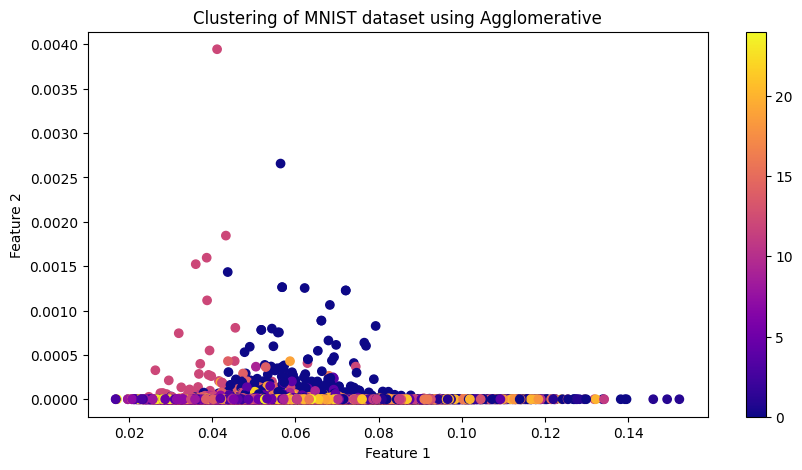

In [20]:
# Plot clusters
plt.figure(figsize=(10, 5))
plt.scatter(DecodedDigits_XTest[:, 0], DecodedDigits_XTest[:, 1], c=result_Agglomerative,cmap='plasma')
plt.colorbar()
plt.title('Clustering of MNIST dataset using Agglomerative')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0]],
 'dcoord': [[0.0, 145.4116317546808, 

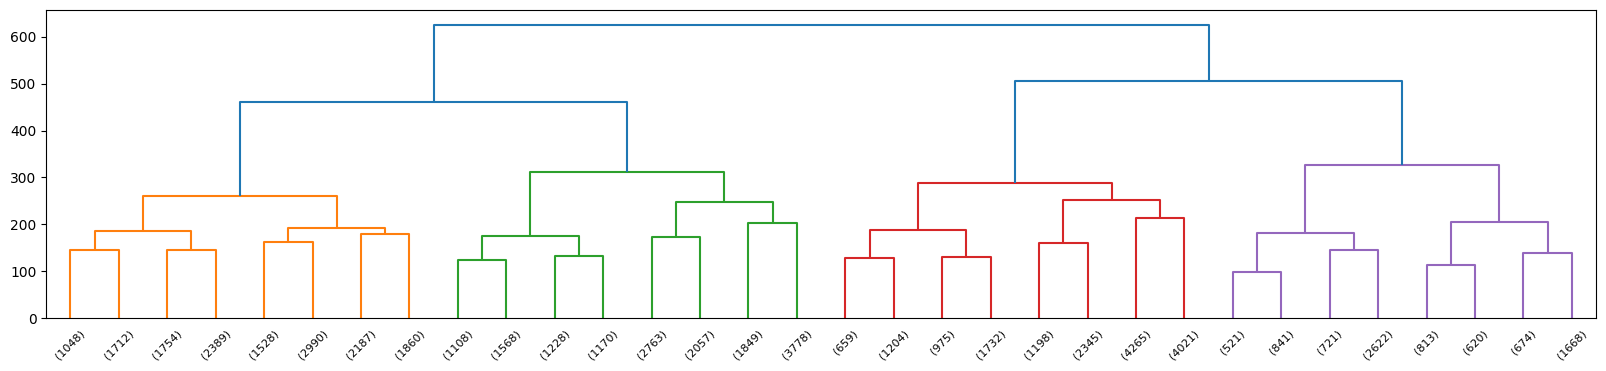

In [22]:
plt.figure(figsize=(20, 4))
agglo_linkage = linkage(DecodedDigits_XTest, method='ward')

dendrogram(agglo_linkage, truncate_mode='level', p=4)

In [23]:
from keras.src.utils import np_utils
from keras.models import Sequential

In [24]:
YTrain = np_utils.to_categorical(YTrain)
YTest = np_utils.to_categorical(YTest)

In [25]:
print(YTrain.shape)

(316583, 26)


In [26]:
num_classes = YTest.shape[1]
num_pixels = DecodedDigits_XTest.shape[1]
print("num_classes:"+str(num_classes))
print("num_pixels:"+str(num_pixels))

num_classes:26
num_pixels:784


In [27]:
model_clasf = Sequential()
model_clasf.add(Dense(256, input_dim=num_pixels, activation='relu'))
model_clasf.add(Dense(64, activation='relu'))
model_clasf.add(Dense(32, activation='relu'))
model_clasf.add(Dense(num_classes, activation='softmax'))

In [28]:
model_clasf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 26)                858       
                                                                 
Total params: 220346 (860.73 KB)
Trainable params: 220346 (860.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model_clasf.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [30]:
DecodedDigits_XTrain.shape

(316583, 784)

In [31]:
YTrain.shape

(316583, 26)

In [32]:
YTrain.shape

(316583, 26)

In [33]:
hist=model_clasf.fit(DecodedDigits_XTrain, YTrain, epochs=50, batch_size=32,shuffle=True,
                    validation_data=(DecodedDigits_XTest, YTest))


2024-06-04 22:42:23.669248: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 992804288 exceeds 10% of free system memory.


Epoch 1/50
9894/9894 [==============================] - 31s 3ms/step - loss: 0.0212 - accuracy: 0.9177 - val_loss: 0.0102 - val_accuracy: 0.9603
Epoch 2/50
9894/9894 [==============================] - 27s 3ms/step - loss: 0.0083 - accuracy: 0.9684 - val_loss: 0.0075 - val_accuracy: 0.9712
Epoch 3/50
9894/9894 [==============================] - 27s 3ms/step - loss: 0.0062 - accuracy: 0.9760 - val_loss: 0.0061 - val_accuracy: 0.9765
Epoch 4/50
9894/9894 [==============================] - 27s 3ms/step - loss: 0.0051 - accuracy: 0.9800 - val_loss: 0.0059 - val_accuracy: 0.9772
Epoch 5/50
9894/9894 [==============================] - 27s 3ms/step - loss: 0.0043 - accuracy: 0.9833 - val_loss: 0.0053 - val_accuracy: 0.9787
Epoch 6/50
9894/9894 [==============================] - 27s 3ms/step - loss: 0.0038 - accuracy: 0.9854 - val_loss: 0.0051 - val_accuracy: 0.9799
Epoch 7/50
9894/9894 [==============================] - 27s 3ms/step - loss: 0.0034 - accuracy: 0.9869 - val_loss: 0.0049 - val_ac

In [34]:
scores = model_clasf.evaluate(DecodedDigits_XTest, YTest, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

1746/1746 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 0.9909
Error: 0.91%


In [35]:
import cv2

In [36]:
img_width, img_height = 28, 28

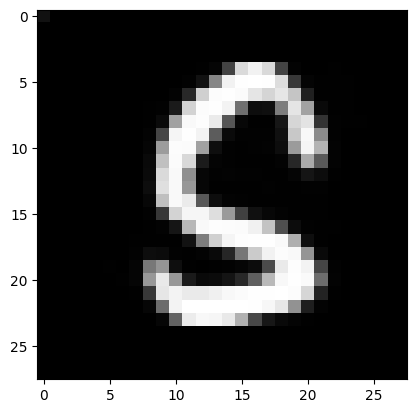

In [37]:
k=random.randint(0, DecodedDigits_XTest.shape[0]-1)

img_load = DecodedDigits_XTest[k].reshape(28, 28)
#gray_image = cv2.cvtColor(img_load, cv2.COLOR_BGR2GRAY)
# print(gray_image)
plt.imshow(img_load)
plt.gray()
plt.show()
# gray_image.shape
x = np.expand_dims(img_load, axis=0)
x = x.reshape((1, -1))

In [38]:
predict_prob=model_clasf.predict(x)
predict_classes=np.argmax(predict_prob,axis=1)
#preds = model_clasf.predict(x)
#prob = model_clasf.predict_proba(x)


print('Predicted value is ',predict_classes[0])
print('Probability across all numbers :', predict_prob[0][predict_classes[0]])

1/1 [==============================] - 0s 39ms/step
Predicted value is  18
Probability across all numbers : 1.0


1/1 [==============================] - 0s 14ms/step


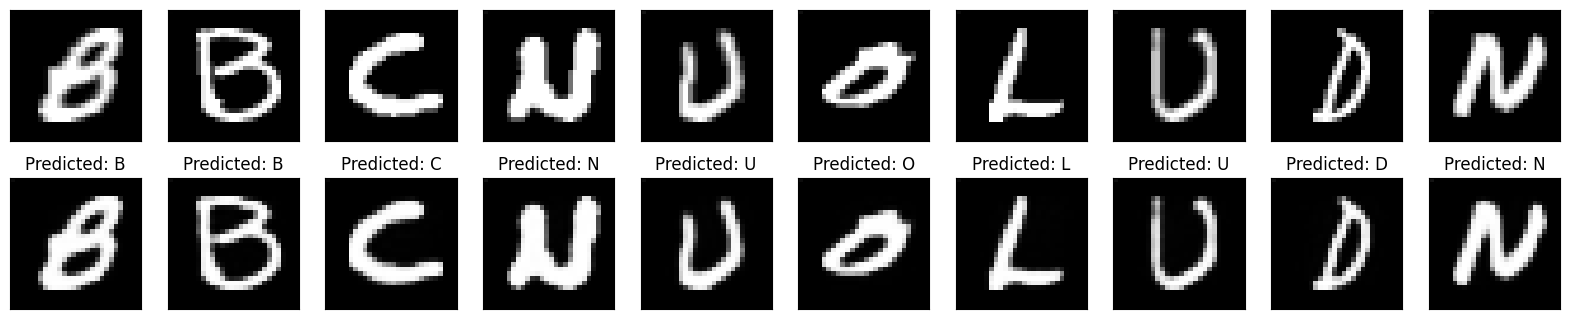

In [42]:
# Plot original images with cluster labels
label=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    k=random.randint(0, DecodedDigits_XTest.shape[0]-1)
    img_load = DecodedDigits_XTest[k]
    x = np.expand_dims(img_load, axis=0)
    x = x.reshape((1, -1))
    predict_prob=model_clasf.predict(x)
    predict_classes=np.argmax(predict_prob,axis=1)
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(XTest[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(DecodedDigits_XTest[k].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(f'Predicted: {label[predict_classes[0]]}')
plt.show()